**Module 3 Final Project**

    Title: Northwinds Database
    Submitted By: RU KEÏN
    Date: December 5, 2019
    Instructor: James Irving PhD

# Table of Contents

1. Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?

2. Do individual countries or regions show a statistically significant preference for discount? If so, which countries and to what extent?

3. Does time of year have a statistically significant effect on sales? If so, which months/seasons? Does this vary by region/country?
    a. average number of orders made
    b. average order size (measured as quantities per order)
    
4. Does cost of shipping (freight) have a statistically significant effect on quantity of a product in an order? If so, at what level(s) of shipping cost?

5. Do individual countries prefer certain products (top 3 selling products overall vs each region/country).


In [ ]:
HA(1): 

# Data Prep

In [3]:
# install requisite libraries and packages
!pip install -U fsds_100719
from fsds_100719.imports import *

fsds_1007219  v0.4.45 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


In [4]:
# connect to database / import data
import sqlite3 
conn = sqlite3.connect('Northwind_small.sqlite')
cur = conn.cursor()

In [15]:
# create dataframe of table names for referencing purposes
cur.execute("""SELECT name from sqlite_master WHERE type='table';""")
df_tables = pd.DataFrame(cur.fetchall(), columns=['Table'])
df_tables

,Table
0,Employee
1,Category
2,Customer
3,Shipper
4,Supplier
5,Order
6,Product
7,OrderDetail
8,CustomerCustomerDemo
9,CustomerDemographic


In [ ]:
# function for converting tables into dataframes on the fly
def get_table(cur, table):
    cur.execute(f"SELECT * from {table};")
    df = pd.DataFrame(cur.fetchall())
    df.columns = [desc[0] for desc in cur.description]
    return df

## Hypothesis 1
Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?

    𝐻1  : Discount amount has a statistically significant effect on the quantity in an order.

    𝐻0 : Discount amount has no relationship with the quantity of a product in an order.

 A) whether any discount affects quantity ordered and if so B) does greater discount mean ordering more products (irrespective of price)?

### Data Grouping

In [29]:
# create dataframe from OrderDetail table since that is where the discount information is stored
cur.execute("""SELECT * FROM OrderDetail;""")
df_orderDetail = pd.DataFrame(cur.fetchall())
df_orderDetail.columns = [x[0] for x in cur.description]
df_orderDetail.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [ ]:
# Generate data groups for testing using pandas.groupby()
SELECT * from OrderDetail 
WHERE Discount > 0
ORDER BY OrderId;


In [91]:
# insert boolean column into orderDetail showing whether or not an order includes a discount value
df_orderDetail['discounted'] = np.where(df_orderDetail['Discount'] == 0.0, 0, 1)

### Testing

In [ ]:
# Select appropriate t-test based on assumptions of normality and homogeneity of variance



In [ ]:
# Check if sample sizes allow us to ignore assumptions; if not, test assumption normality



In [ ]:
# Test for homogeneity of variance



In [14]:
# Perform chosen statistical test, calculate effect size, and any post-hoc tests.



In [ ]:
# Aim 3: Perform chosen statistical test, calculate effect size, and any post-hoc tests.
To perform post-hoc pairwise comparison testing
Effect size calculation
Cohen's d

Statistical Analysis Pipeline
Test for Normality
D'Agostino-Pearson's normality test
scipy.stats.normaltest
Shapiro-Wilik Test
scipy.stats.shapiro
Test for Homogeneity of Variance

Levene's Test
scipy.stats.levene
Choose appropriate test based upon 1. and 2.

T Test (1-sample)
stats.ttest_1samp()
T Test (2-sample)
stats.ttest_ind()
docs
Welch's T-Test (2-sample)

stats.ttest_ind(equal_var=False)
docs
Mann Whitney U

stats.mannwhitneyu()
docs
ANOVA
stats.f_oneway()
docs
Tukey's
statsmodels.stats.multicomp.pairwise_tukeyhsd -docs
Calculate effect size for significant results.

Effect size: cohen's d
Interpretation:
Small effect = 0.2 ( cannot be seen by naked eye)
Medium effect = 0.5
Large Effect = 0.8 (can be seen by naked eye)
If significant, follow up with post-hoc tests (if have more than 2 groups)

Tukey's

In [93]:
df_orderDetail.tail()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,discounted
2150,11077/64,11077,64,33.25,2,0.03,1
2151,11077/66,11077,66,17.00,1,0.00,0
2152,11077/73,11077,73,15.00,2,0.01,1
2153,11077/75,11077,75,7.75,4,0.00,0
2154,11077/77,11077,77,13.00,2,0.00,0


In [106]:
df_orderDetail['Discount'].value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

In [161]:
# split order data into two groups: discounted and fullprice
fullprice = df_orderDetail.groupby('discounted').get_group(0)['Quantity']
discount = df_orderDetail.groupby('discounted').get_group(1)['Quantity']

<BarContainer object of 1 artists>

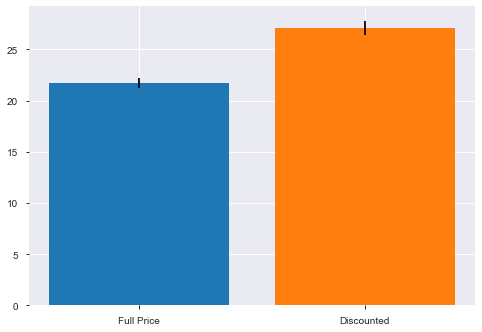

In [162]:
# visualize sample size comparisons for two groups (normality check)
import scipy.stats as stat
plt.bar(x='Full Price', height=fullprice.mean(), yerr=stat.sem(nodisc))
plt.bar(x='Discounted', height=discount.mean(), yerr=stat.sem(disc))

In [163]:
# Test for normality
stat.normaltest(fullprice), stat.normaltest(discount)

(NormaltestResult(statistic=544.5770045551502, pvalue=5.579637380545965e-119),
 NormaltestResult(statistic=261.528012299789, pvalue=1.6214878452829618e-57))

In [164]:
# Run non-parametric test (since normality test failed)
stat.mannwhitneyu(fullprice, discount)

MannwhitneyuResult(statistic=461541.0, pvalue=6.629381826999866e-11)

In [165]:
# run tukey test for OQD (Order Quantity Discount) 
data = df_orderDetail['Quantity'].values
labels = df_orderDetail['Discount'].values

import statsmodels.api as sms
model = sms.stats.multicomp.pairwise_tukeyhsd(data,labels)

In [166]:
# save OQD tukey test model results into dataframe (OQD: order quantity discount)
tukey_OQD = pd.DataFrame(data=model._results_table[1:], columns=model._results_table[0])
tukey_OQD

,group1,group2,meandiff,p-adj,lower,upper,reject
0,0.0,0.01,-19.7153,0.9,-80.3306,40.9001,False
1,0.0,0.02,-19.7153,0.9,-62.593,23.1625,False
2,0.0,0.03,-20.0486,0.725,-55.0714,14.9742,False
3,0.0,0.04,-20.7153,0.9,-81.3306,39.9001,False
4,0.0,0.05,6.2955,0.0011,1.5381,11.053,True
5,0.0,0.06,-19.7153,0.9,-80.3306,40.9001,False
6,0.0,0.1,3.5217,0.4269,-1.3783,8.4217,False
7,0.0,0.15,6.6669,0.0014,1.551,11.7828,True
8,0.0,0.2,5.3096,0.0303,0.2508,10.3684,True
9,0.0,0.25,6.525,0.0023,1.3647,11.6852,True


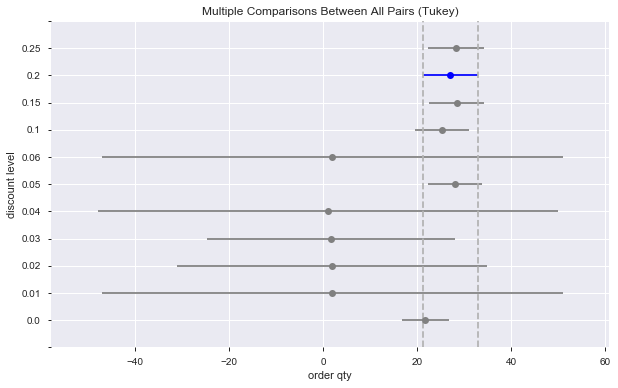

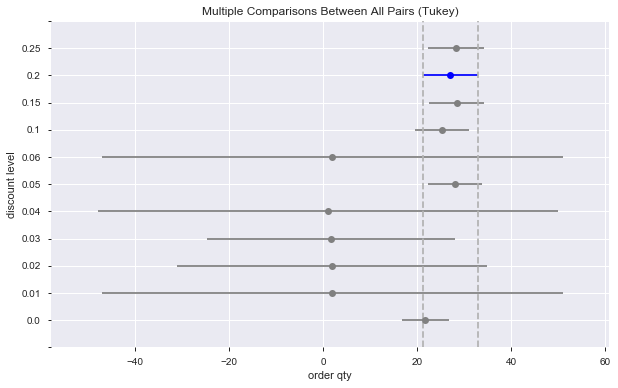

In [167]:
# Plot a universal confidence interval of each group mean comparing significant differences in group means. 
# Significant differences at the alpha=0.05 level can be identified by intervals that do not overlap 

oq_data = df_orderDetail['Quantity'].values
discount_labels = df_orderDetail['Discount'].values

from statsmodels.stats.multicomp import MultiComparison
oqd = MultiComparison(oq_data, discount_labels)
results = oqd.tukeyhsd()
results.plot_simultaneous(comparison_name=0.2, xlabel='order qty', ylabel='discount level')

In [ ]:
# Reject null hypothesis for discount and order quantity where discount = [0.05, 0.1, 0.15, 0.2, 0.25]

In [170]:
disc_0 = df_orderDetail[df_orderDetail['Discount'] == 0.0]
disc_05 = df_orderDetail[df_orderDetail['Discount'] == 0.05]
disc_10 = df_orderDetail[df_orderDetail['Discount'] == 0.10]
disc_15 = df_orderDetail[df_orderDetail['Discount'] == 0.15]
disc_20 = df_orderDetail[df_orderDetail['Discount'] == 0.20]
disc_25 = df_orderDetail[df_orderDetail['Discount'] == 0.25]

mean_oqd = [disc_05.Quantity.mean(),disc_10.Quantity.mean(),disc_15.Quantity.mean(),disc_20.Quantity.mean(),disc_25.Quantity.mean()]
dv = [.05,.10,.15,.20,.25] # dp: discount value

mean_oqd = dict(zip(dv, np.round(mean_oqd,2)))
print(mean_oqd)

{0.05: 28.01, 0.1: 25.24, 0.15: 28.38, 0.2: 27.02, 0.25: 28.24}


In [178]:
df_oqd = df_orderDetail.loc[(df_orderDetail['Discount'] >= 0.05) & (df_orderDetail['Discount'] != 0.06)]
df_oqd

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,discounted
6,10250/51,10250,51,42.4,35,0.15,1
7,10250/65,10250,65,16.8,15,0.15,1
8,10251/22,10251,22,16.8,6,0.05,1
9,10251/57,10251,57,15.6,15,0.05,1
11,10252/20,10252,20,64.8,40,0.05,1
...,...,...,...,...,...,...,...
2130,11077/2,11077,2,19.0,24,0.20,1
2134,11077/7,11077,7,30.0,1,0.05,1
2135,11077/8,11077,8,40.0,2,0.10,1
2137,11077/12,11077,12,38.0,2,0.05,1


(array([185., 173., 157., 315.]),
 array([0.05, 0.1 , 0.15, 0.2 , 0.25]),
 <a list of 4 Patch objects>)

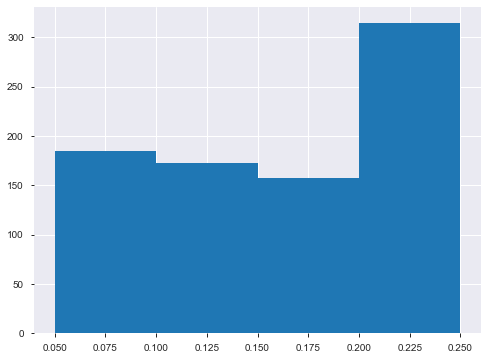

In [179]:
fig = plt.figure(figsize=(8,6))
plt.hist(data=df_oqd, x='Discount', bins=dv)

In [ ]:
#### Cohen's d
def Cohen_d(group1, group2):
    # Compute Cohen's d.
    # group1: Series or NumPy array
    # group2: Series or NumPy array
    # returns a floating point number 
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [182]:
oqd_mean = df_oqd['Quantity'].mean()
pop_mean = df_orderDetail['Quantity'].mean()
print(oqd_mean, pop_mean)

27.35421686746988 23.812993039443157


In [183]:
# difference in means between discount orders and all orders (population)
diff = oqd_mean - pop_mean
diff

3.541223828026723

In [223]:
from pandas_profiling import ProfileReport
ProfileReport(df_oqd)

## Hypothesis 2



In addition to answering this question with a hypothesis test, you will also need to come up with at least 3 other hypotheses to test on your own. These can by anything that you think could be imporant information for the company.

For this hypothesis, be sure to specify both the null hypothesis and the alternative hypothesis for your question. You should also specify if this is one-tail or a two-tail test.

In [215]:
prod_price = df_oqd[{'ProductId', 'UnitPrice', 'Quantity'}]
prod_price.set_index('ProductId', inplace=True)
prod_price

,UnitPrice,Quantity
ProductId,,
51,42.4,35
65,16.8,15
22,16.8,6
57,15.6,15
20,64.8,40
...,...,...
2,19.0,24
7,30.0,1
8,40.0,2


In [222]:
# use numpy broadcasting to calculate revenue of orders : unitprice * quantity for each of the sig disc levels

prod_price['OrderPrice'] = prod_price.UnitPrice * prod_price.Quantity
prod_price

/Users/hakkeray/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,UnitPrice,Quantity,OrderPrice
ProductId,,,
51,42.4,35,1484.0
65,16.8,15,252.0
22,16.8,6,100.8
57,15.6,15,234.0
20,64.8,40,2592.0
...,...,...,...
2,19.0,24,456.0
7,30.0,1,30.0
8,40.0,2,80.0


In [186]:
df_oqd['UnitPrice'].unique()

array([ 42.4 ,  16.8 ,  15.6 ,  64.8 ,   2.  ,   3.6 ,  19.2 ,  15.2 ,
        17.  ,  25.6 ,   7.7 ,  39.4 ,  12.  ,  13.9 ,  20.7 ,   8.  ,
        30.4 ,  44.  ,  14.4 ,  27.8 ,  24.8 ,  10.  ,  14.7 ,  31.2 ,
        35.1 ,  27.2 ,  11.2 ,  26.2 ,   9.6 ,   5.9 ,   4.8 ,  15.5 ,
        50.  ,  99.  ,  10.6 ,   7.3 , 210.8 ,  24.9 ,   7.6 ,  17.2 ,
        17.6 ,  36.8 ,  32.  ,   6.2 ,  13.  ,  28.8 ,  36.4 ,  26.6 ,
        24.  ,   5.6 ,  18.6 ,  10.2 ,  16.  ,  77.6 ,  10.4 ,  22.8 ,
        13.6 ,  45.6 ,  14.  ,  15.  ,  46.  ,  12.75,   7.75,  22.  ,
        30.  ,  40.  ,   4.5 ,   9.5 ,  34.  ,  28.5 ,  97.  ,   2.5 ,
        62.5 ,   9.65,  31.  ,  18.  ,  25.89,  18.4 ,  39.  ,  81.  ,
        26.  ,  38.  ,  19.  ,   7.45,  21.  ,  19.5 ,  55.  , 263.5 ,
        21.05,  21.5 ,   9.  ,  12.5 ,  53.  ,  17.45,  49.3 ,  23.25,
         9.2 ,  33.25,  36.  ,   7.  ,  31.23,  43.9 ,  20.  ,   6.  ,
        21.35,  16.25,  32.8 ,  19.45,  13.25, 123.79,  34.8 ,  25.  ])

In [85]:
df_employees = get_table(cur, table="'employee'")
df_product = get_table(cur, table="'Product'")
df_product.head(2)
df_order = get_table(cur, table="'Order'")
df_order.head()

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.0,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.0,17,40,25,0


In [ ]:


from scipy.stats import sem
fig, ax = plt.subplots(figsize=(2,6))
ax.bar(group1['name'],group1['data'].mean(), yerr=sem(group1['data']))

ax.bar(group2['name'],group2['data'].mean(), yerr=sem(group2['data']))

In [2]:
from scipy import stats

def print_normtest(x,label=None,as_series=False):
    """Runs scipy.stats.normaltest and prints results,
    may also return them if as_series=True
    """
    if label is None:
        try:
            label=x.name
        except:
            label=''

    results = ['Survived','Norm Stat','p value','(p<0.05)']

    out = stats.normaltest(x)

    values = [label, out.statistic.round(3),
              out.pvalue.round(4), out.pvalue<0.05]

    results=dict(zip(results,values))

    print(f"\n--- stats.normtest results:")
    [print(f"{k:{15}} : {v}")for k,v in results.items()]
    
    if as_series:
        return pd.Series(results)

In [1]:
#### Cohen's d
def Cohen_d(group1, group2):
    # Compute Cohen's d.
    # group1: Series or NumPy array
    # group2: Series or NumPy array
    # returns a floating point number 
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

NameError: name 'group1' is not defined

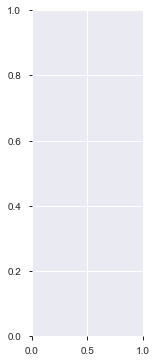

In [16]:
from scipy.stats import sem
fig, ax = plt.subplots(figsize=(2,6))
ax.bar(group1['name'],group1['data'].mean(), yerr=sem(group1['data']))

ax.bar(group2['name'],group2['data'].mean(), yerr=sem(group2['data']))

In [ ]:
SELECT * from OrderDetail 
WHERE Discount > 0
ORDER BY OrderId;

In [ ]:
cur.execute("""SELECT customerName,
               COUNT(amount) AS number_purchases_over_50K
               FROM customers
               JOIN payments
               USING(customerNumber)
               WHERE amount >= 50000
               GROUP BY 1
               HAVING count(amount) >= 3
               ORDER BY count(amount) DESC;""")
df = pd.DataFrame(cur.fetchall())
df. columns = [i[0] for i in cur.description]
print(len(df))
df.head()

In [ ]:
cur.execute("""SELECT city, COUNT(customerNumber) AS number_customers
               FROM customers
               GROUP BY 1
               HAVING COUNT(customerNumber)>=5;""")
df = pd.DataFrame(cur.fetchall())
df. columns = [i[0] for i in cur.description]
print(len(df))
df.head()

In [13]:

from pandas_profiling import ProfileReport
ProfileReport(df_orderDetail)